In [245]:
import numpy as np
import pandas as pd

In [481]:
df_athelete = pd.read_csv('athlete_events.csv')
df_noc = pd.read_csv('noc_regions.csv')

In [521]:
df_athelete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [483]:
df_noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# we want summer edition only

In [484]:
df_athelete = df_athelete[df_athelete['Season']=='Summer']

In [485]:
df_athelete.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
dtype: int64

In [486]:
df_athelete.duplicated().sum()

1385

In [487]:
df_athelete.drop_duplicates(inplace=True)

In [488]:
df_athelete.duplicated().sum()

0

In [489]:
df = df_athelete.merge(df_noc,on='NOC',how='left')

In [490]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [491]:
df = pd.concat([df,(pd.get_dummies(df['Medal'],dtype='int'))],axis=1)

In [461]:
df.drop(columns=['Medal'],inplace=True)

In [492]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [493]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','Season','City','Sport','Event','Medal'])

In [494]:
medal_tally = medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values(by='Gold',ascending=False).reset_index()

In [495]:
medal_tally.head()

,NOC,Gold,Silver,Bronze
0,USA,1035,802,708
1,URS,394,317,294
2,GBR,278,317,300
3,GER,235,261,283
4,FRA,234,256,287


In [496]:
medal_tally['total'] = medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze'] 

In [497]:
years = df['Year'].unique().tolist()

In [498]:
years.sort()
years.insert(0,'Overall')
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [499]:
country = np.unique(df['region'].dropna().values).tolist()

In [500]:
country.sort()
country.insert(0,'Overall')
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [268]:
def fetch_year_country(df,year,country):
    
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','Season','City','Sport','Event','Medal'])
    flag = 0
    
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
        
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year']==year]
        
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region']==country]
        
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year']==year) & (medal_df['region']==country)]
        
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values(by='Year').reset_index()
    else:   
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values(by='Gold',ascending=False).reset_index()
        
    x['total'] = x['Gold']+x['Silver']+x['Bronze']
    print(x) 

In [269]:
fetch_year_country(df=df,year='Overall',country='USA')

    Year  Gold  Silver  Bronze  total
0   1896    11       6       2     19
1   1900    21      16      17     54
2   1904    76      79      76    231
3   1906    12       5       6     23
4   1908    22      12      12     46
5   1912    26      18      19     63
6   1920    41      27      27     95
7   1924    45      27      27     99
8   1928    22      18      16     56
9   1932    44      36      30    110
10  1936    24      21      12     57
11  1948    38      27      19     84
12  1952    40      19      17     76
13  1956    32      25      17     74
14  1960    34      21      16     71
15  1964    36      26      28     90
16  1968    45      28      34    107
17  1972    33      31      30     94
18  1976    34      35      25     94
19  1984    82      61      30    173
20  1988    36      31      27     94
21  1992    37      34      37    108
22  1996    44      32      25    101
23  2000    36      24      31     91
24  2004    36      39      26    101
25  2008    

In [270]:
medal_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221143,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
221145,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
221151,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0
221152,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221167 entries, 0 to 221166
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      221167 non-null  int64  
 1   Name    221167 non-null  object 
 2   Sex     221167 non-null  object 
 3   Age     212137 non-null  float64
 4   Height  170667 non-null  float64
 5   Weight  168661 non-null  float64
 6   Team    221167 non-null  object 
 7   NOC     221167 non-null  object 
 8   Games   221167 non-null  object 
 9   Year    221167 non-null  int64  
 10  Season  221167 non-null  object 
 11  City    221167 non-null  object 
 12  Sport   221167 non-null  object 
 13  Event   221167 non-null  object 
 14  Medal   34077 non-null   object 
 15  region  220797 non-null  object 
 16  notes   4397 non-null    object 
 17  Bronze  221167 non-null  int32  
 18  Gold    221167 non-null  int32  
 19  Silver  221167 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(12)
me

In [276]:
df['Year'].unique().shape[0]-1

28

In [275]:
df['City'].unique().shape[0]

23

In [274]:
df['Event'].unique().shape[0]

651

In [273]:
df['Sport'].unique().shape[0]

52

In [272]:
df['Name'].unique().shape[0]

116122

In [229]:
df['region'].unique().shape[0]

206

In [530]:
#participation nations over time
import plotly.express as px

nations_over_time = df.drop_duplicates(subset=['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')
nations_over_time.rename(columns={'Year':'Edition','count':'No. of countries'},inplace=True)
nations_over_time

,Edition,No. of countries
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [531]:
fig = px.line(nations_over_time,x='Edition',y='No. of countries')
fig.show()

In [296]:
#events over time

events_over_time = df.drop_duplicates(subset=['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')
events_over_time.rename(columns={'Year':'Edition','count':'No. of events'},inplace=True)
events_over_time

,Edition,No. of events
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [297]:
fig = px.line(events_over_time,x='Edition',y='No. of events')
fig.show()

In [303]:
x = df.drop_duplicates(subset=['Year','Sport','Event'])
x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int')

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Year', ylabel='Sport'>

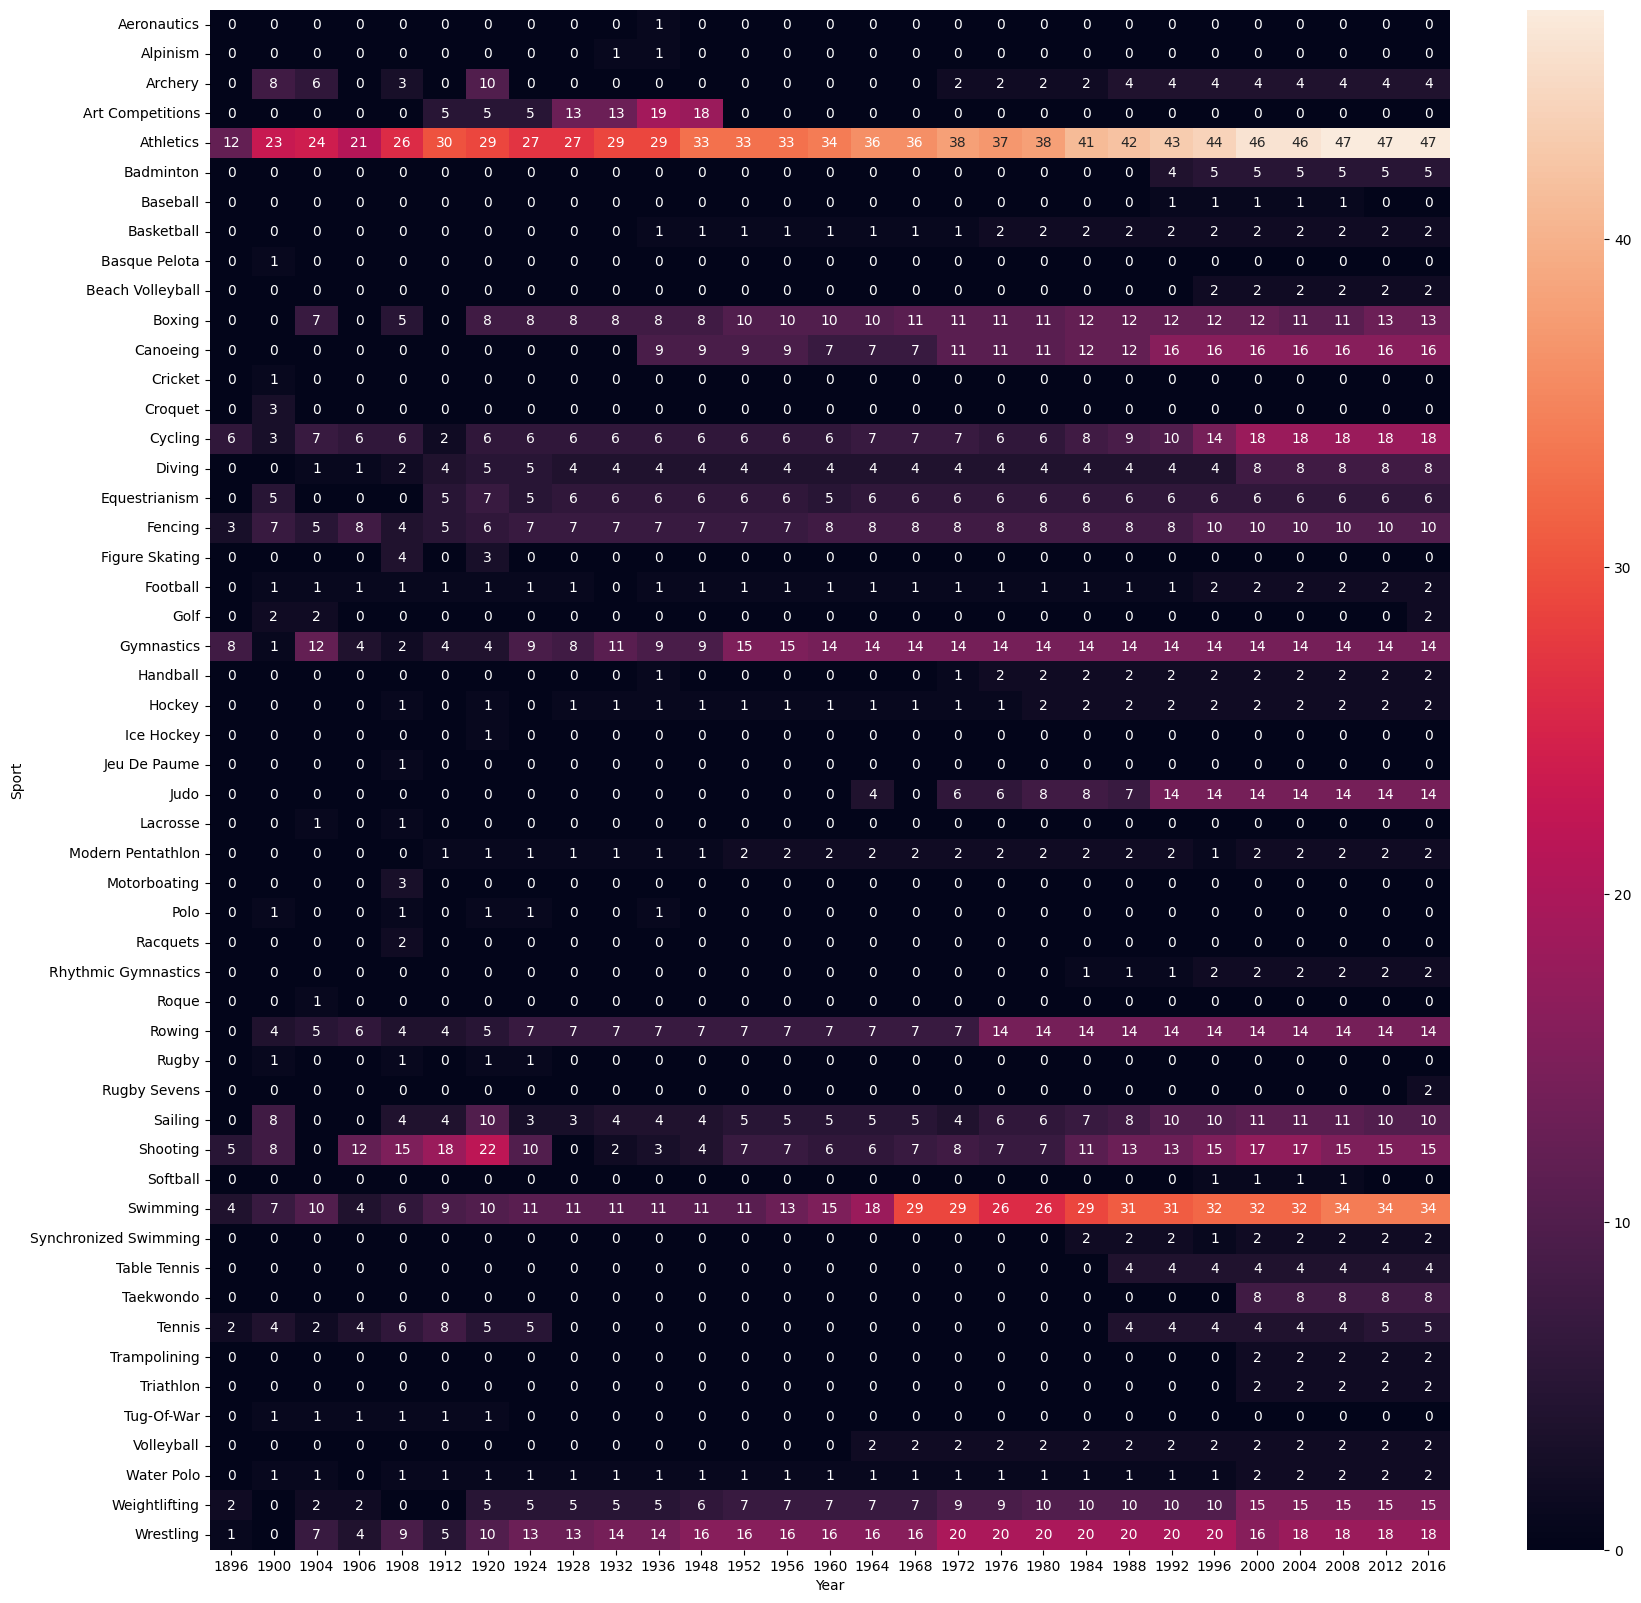

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [326]:
#most succesful player in their field
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221162,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
221163,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
221164,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
221165,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [389]:
df['Medal'].dtype

dtype('O')

In [438]:
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport']==sport]
        
        x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,on='Name',how='left')[['Name','count','Sport','region']].drop_duplicates('Name')
        x.rename(columns={'count':'Medals'},inplace=True)
        return x

In [439]:
most_successful(df,'Swimming')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
47,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
60,Ryan Steven Lochte,12,Swimming,USA
74,Natalie Anne Coughlin (-Hall),12,Swimming,USA
86,"Matthew Nicholas ""Matt"" Biondi",11,Swimming,USA
98,Mark Andrew Spitz,11,Swimming,USA
110,"Gary Wayne Hall, Jr.",10,Swimming,USA
120,Franziska van Almsick,10,Swimming,Germany
143,Shirley Frances Babashoff,9,Swimming,USA


In [430]:
sport_list = df['Sport'].unique().tolist()
sport_list.insert(0,'Overall')
sport_list

['Overall',
 'Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Modern Pentathlon',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Trampolining',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']

# making a raw data df_athlete + df_noc without preprocessing

In [447]:
df = df_athelete.merge(df_noc,on='NOC',how='left')

In [448]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN


In [450]:
temp_df = df.dropna(subset=['Medal'])
temp_df = temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','Season','City','Sport','Event','Medal'])
nation_medal_tally = temp_df[temp_df['region']=='India']
final_df = nation_medal_tally.groupby('Year').count()['Medal'].reset_index()

,Year,Medal
0,1900,2
1,1928,1
2,1932,1
3,1936,1
4,1948,1
5,1952,2
6,1956,1
7,1960,1
8,1964,1
9,1968,1


In [501]:
fig = px.line(final_df,x='Year',y='Medal')
fig.show()

C:\Users\Nikhi\AppData\Local\Temp\ipykernel_1512\857502748.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Year', ylabel='Sport'>

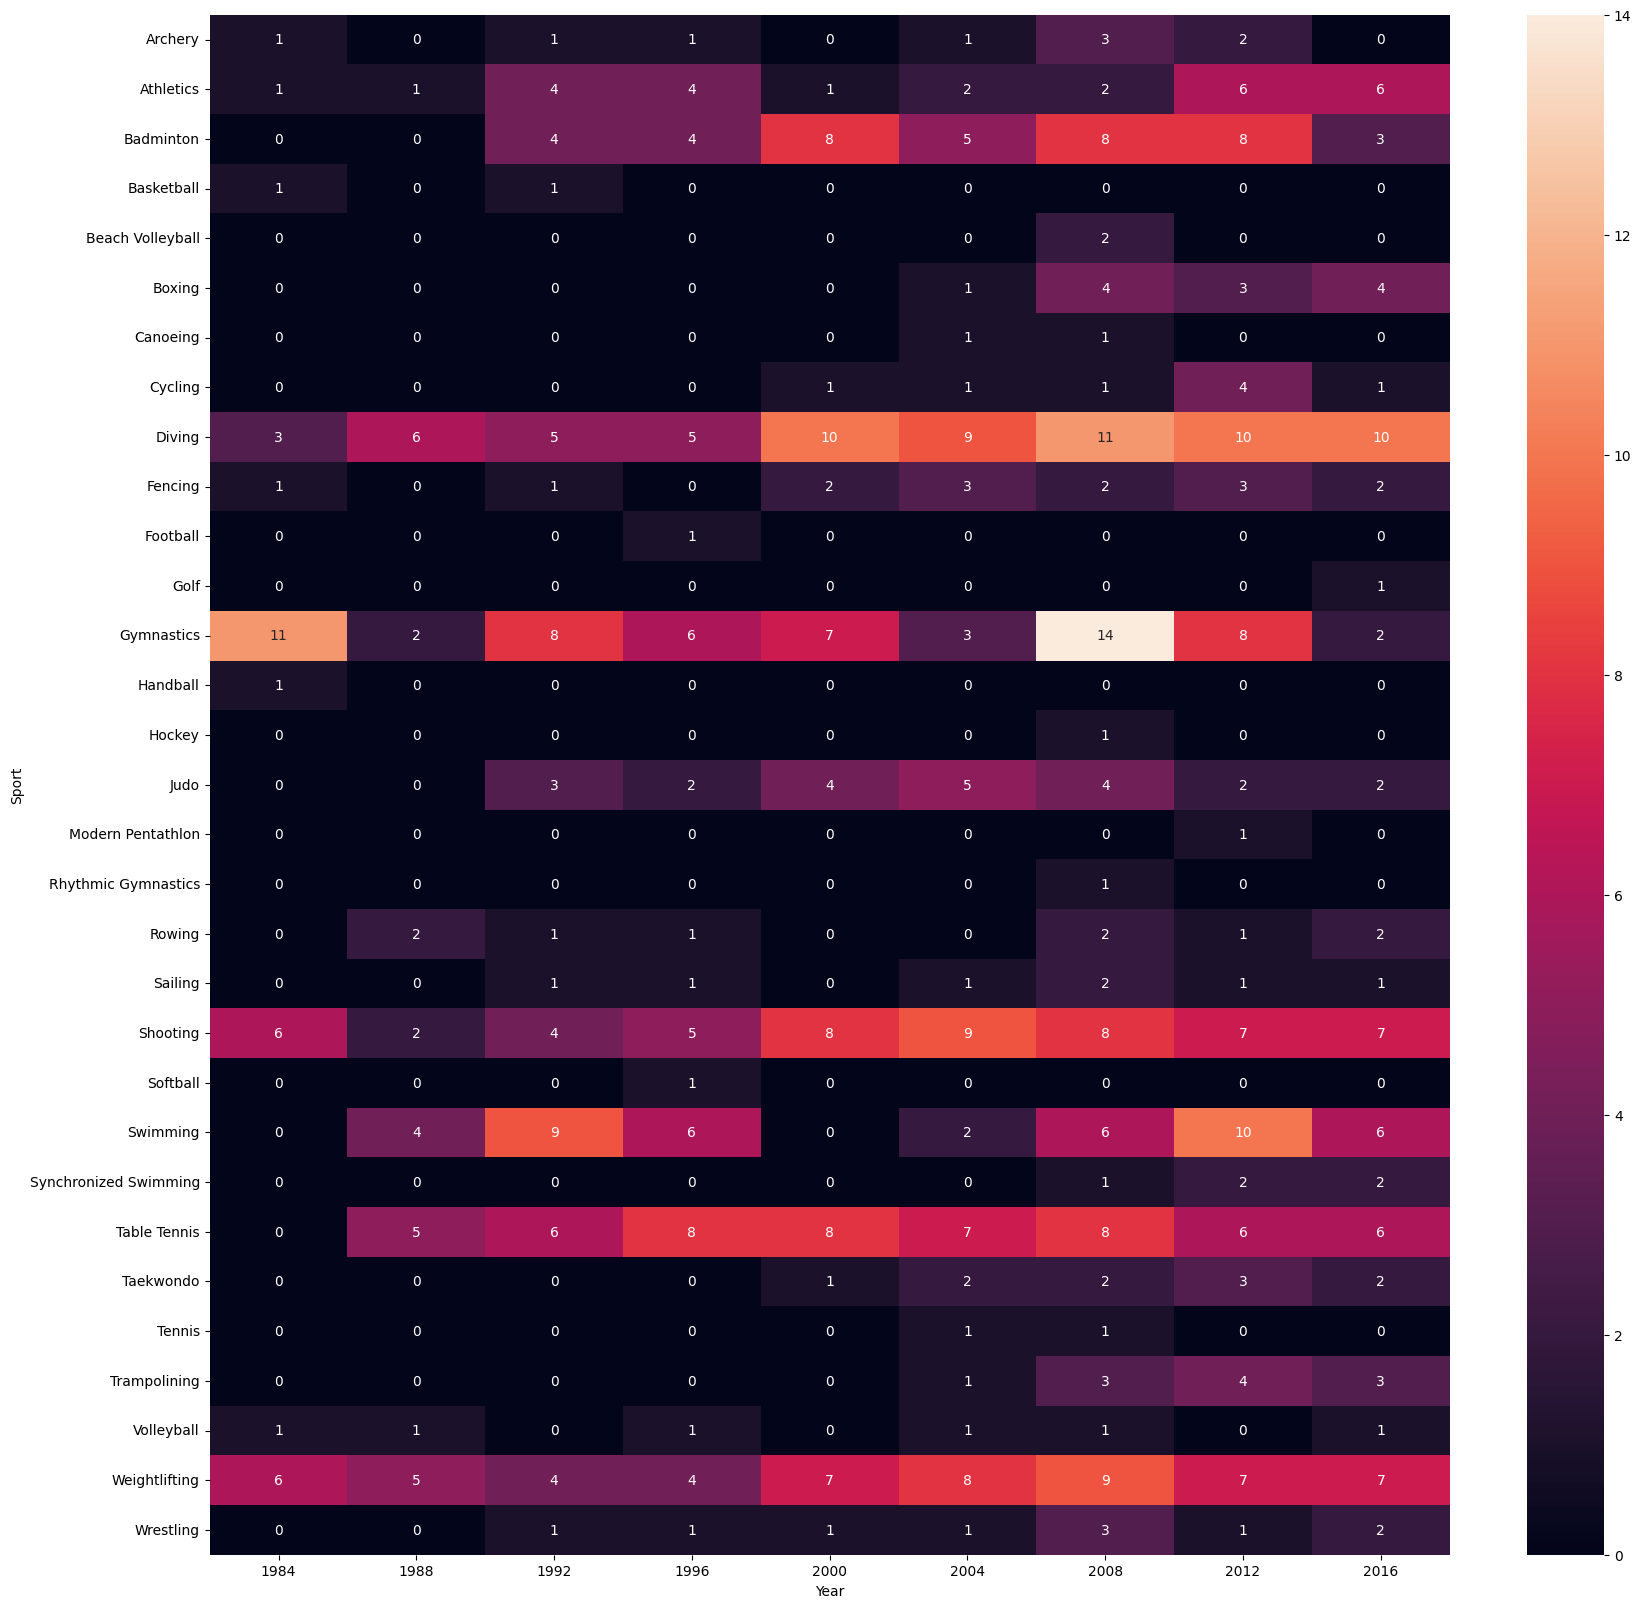

In [511]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','Season','City','Sport','Event','Medal'],inplace=True)
new_df = temp_df[temp_df['region']=='China']

plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype('int'),annot=True)

In [512]:
def successful_athlete_inRegion(df,country):
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['region']==country]
        
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,on='Name',how='left')[['Name','count','Sport']].drop_duplicates('Name')
    x.rename(columns={'count':'Medals'},inplace=True)
    return x

In [516]:
successful_athlete_inRegion(df,'Jamaica')

,Name,Medals,Sport
0,Merlene Joyce Ottey-Page,9,Athletics
19,Veronica Angella Campbell-Brown,8,Athletics
30,Usain St. Leo Bolt,8,Athletics
40,Shelly-Ann Fraser-Pryce,6,Athletics
47,"Donald O'Reilly ""Don"" Quarrie",4,Athletics
56,"Herbert Henry ""Herb"" McKenley",4,Athletics
62,Arthur Stanley Wint,4,Athletics
68,Novlene Hilaire Williams-Mills,4,Athletics
75,Yohan Blake,4,Athletics
81,Sherone Anmarica Simpson,3,Athletics


In [526]:
import plotly.figure_factory as ff
import scipy

athlete_df = df.drop_duplicates(subset=['Name','region'])
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [527]:
ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)

In [529]:
famous_sports = [
 'Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Rhythmic Gymnastics',
 'Trampolining',
 'Beach Volleyball',
 'Triathlon',
 'Polo',
 'Ice Hockey',
 'Racquets']

In [ ]:
for sport in famous_sports:
    x = []
    name = []
    temp_df = athlete_df[athlete_df['Sport']==sport]
    x.append(temp_df[temp_df['Medal']=='Gold']['Age'].dropna())
    name.append(sport)   

In [542]:
#men v/s women participation over the years
men = athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()
final = men.merge(women,on='Year',how='left')
final['Name_y'] = final['Name_y'].fillna(0).astype('int')
final.rename(columns={'Name_x':'Men','Name_y':'Women'},inplace=True)
final

,Year,Men,Women
0,1896,174,0
1,1900,1181,23
2,1904,629,6
3,1906,759,6
4,1908,1772,44
5,1912,1978,53
6,1920,2280,73
7,1924,2535,132
8,1928,2342,285
9,1932,1382,162
